##**SEMINARI 2**

Jan Prats 213927 | Oscar Sanz 253613 | Julia Pérez 267029

##**Part I: Data preparation & analysis**

 **Create a function/script that takes SkelletonPoints as input and plots the corre
sponding pose. Your plotting function should also display the label associated with
 the pose being plotted.**

In [ ]:
!pip install scikit-learn

from google.colab import drive
import pandas as pd

# CARGAR DATOS
drive.mount('/content/drive')

# Ruta Julia
# base_path = '/content/drive/My Drive/3r/ML4N/ML for Networks/dataset_Seminari2/'

# Ruta Jan
#base_path = '/content/drive/My Drive/ML/'

#Ruta Oscar
base_path = '/content/drive/My Drive/MLforNetworks/dataset_Seminari2'

# Rutes csv
skeleton_path_train = base_path + 'Train_skelletonpoints.csv'
features_path_train = base_path + 'Train_features.csv'
labels_path_train = base_path + 'Train_labels.csv'
skeleton_path_test = base_path + 'Test_skelletonpoints.csv'
features_path_test = base_path + 'Test_features.csv'
labels_path_test = base_path + 'Test_labels.csv'

## Cargar los datos
# train
df_skeleton_train = pd.read_csv(skeleton_path_train, header=None)
df_features_train = pd.read_csv(features_path_train, header=None)
df_labels_train = pd.read_csv(labels_path_train, header=None)
#test
df_skeleton_test = pd.read_csv(skeleton_path_test, header=None)
df_features_test = pd.read_csv(features_path_test, header=None)
df_labels_test = pd.read_csv(labels_path_test, header=None)

Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/ML for Networks/dataset_Seminari2Train_skelletonpoints.csv'

We load the dataset CSV files (skeleton coordinates, CSI features, and class labels) into pandas DataFrames. This allows the training and test data to be organized in a structured way for further analysis and modeling.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

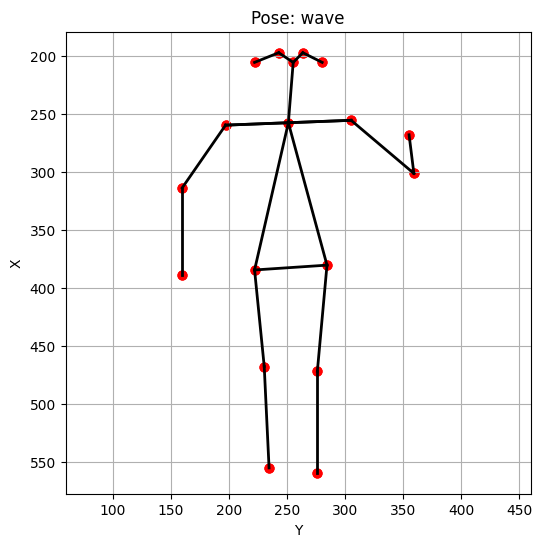

In [ ]:
import matplotlib.pyplot as plt
#from sklearn.ensemble import RandomForestClassifier

def plot_skeleton(sample_idx):
    x = df_skeleton_train.iloc[sample_idx, 0:18].values
    y = df_skeleton_train.iloc[sample_idx, 18:36].values

    # Conexiones entre los keypoints (indexados desde 0 en Python)
    connections = [
        (0, 1), (1, 2), (2, 3), (3, 4), (1, 5), (5, 6), (6, 7),
        (1, 8), (8, 9), (9, 10), (1, 11), (11, 12), (12, 13),
        (0, 14), (0, 15), (14, 16), (15, 17), (2, 5), (8, 11)
    ]

    # Obtener la etiqueta
    label_num = int(df_labels_train.iloc[sample_idx, 0])
    pose_label = label_map.get(label_num, "Desconocida")

    plt.figure(figsize=(6, 6))

    # Dibujar conexiones
    for (start, end) in connections:
        plt.plot([y[start], y[end]], [x[start], x[end]], 'k-', lw=2)

    # Dibujar puntos
    plt.scatter(y, x, c='r', s=40)

    # Opcional: numerar puntos
    #for i, (xi, yi) in enumerate(zip(x, y)):
    #    plt.text(xi, yi, str(i+1), fontsize=8)

    plt.scatter(y, x, c='r', s=40)
    plt.title(f"Pose: {pose_label}")
    plt.xlabel("Y")
    plt.ylabel("X")
    plt.gca().invert_yaxis()
    plt.axis('equal')
    plt.grid(True)
    plt.show()


# Ejemplo
plot_skeleton(3)


We load the skeleton points, with X and Y coordinates. Then, we connect those points with lines (simulating the human body).We also display the label associated with that pose.

This helps visually understand how each pose looks in the dataset. It's an exploratory step to verify that the data is coherent and that the labels are well aligned with the actual poses.

**Now, focus on the CSI data (for instance, from Train
 features.csv) and implement
 the code for plotting the average CSI amplitude per subcarrier. Such a plot should
 allow for understanding the status of the channel at a given specific moment and for a
 specific subcarrier.**

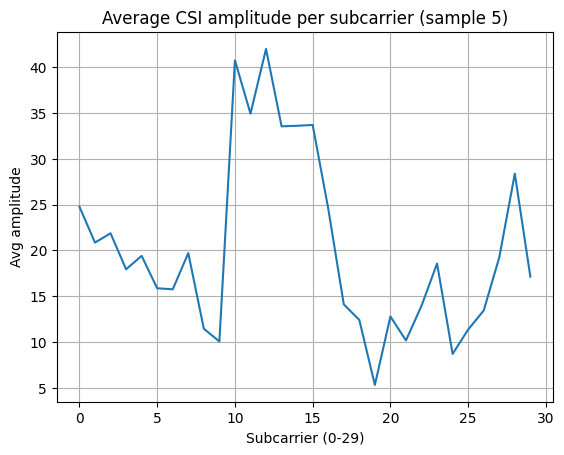

In [ ]:
import numpy as np

def plot_average_amplitude(sample_idx):
    # Tomar fila y convertir a matriz 30x3x3
    csi_vector = df_features_train.iloc[sample_idx].values
    csi_matrix = csi_vector.reshape((30, 3, 3))

    # Calcular amplitud media por subportadora
    amplitude = np.abs(csi_matrix)
    mean_amplitude = amplitude.mean(axis=(1, 2))

    plt.figure()
    plt.plot(mean_amplitude)
    plt.title(f'Average CSI amplitude per subcarrier (sample {sample_idx})')
    plt.xlabel('Subcarrier (0-29)')
    plt.ylabel('Avg amplitude')
    plt.grid(True)
    plt.show()

# Ejemplo
plot_average_amplitude(5)


First, we load a sample from the feature file (CSI). It's reshaped into a 30 × 3 × 3 matrix (30 subcarriers, 3 Tx antennas, 3 Rx antennas). Finally, the mean signal amplitude per subcarrier is calculated.

This gives you an idea of the Wi-Fi channel state at a given moment, which is important because the way the human body affects the signal can be used to infer the pose.

**Finally, plot the distribution of the CSI amplitude across each subcarrier for each class.**

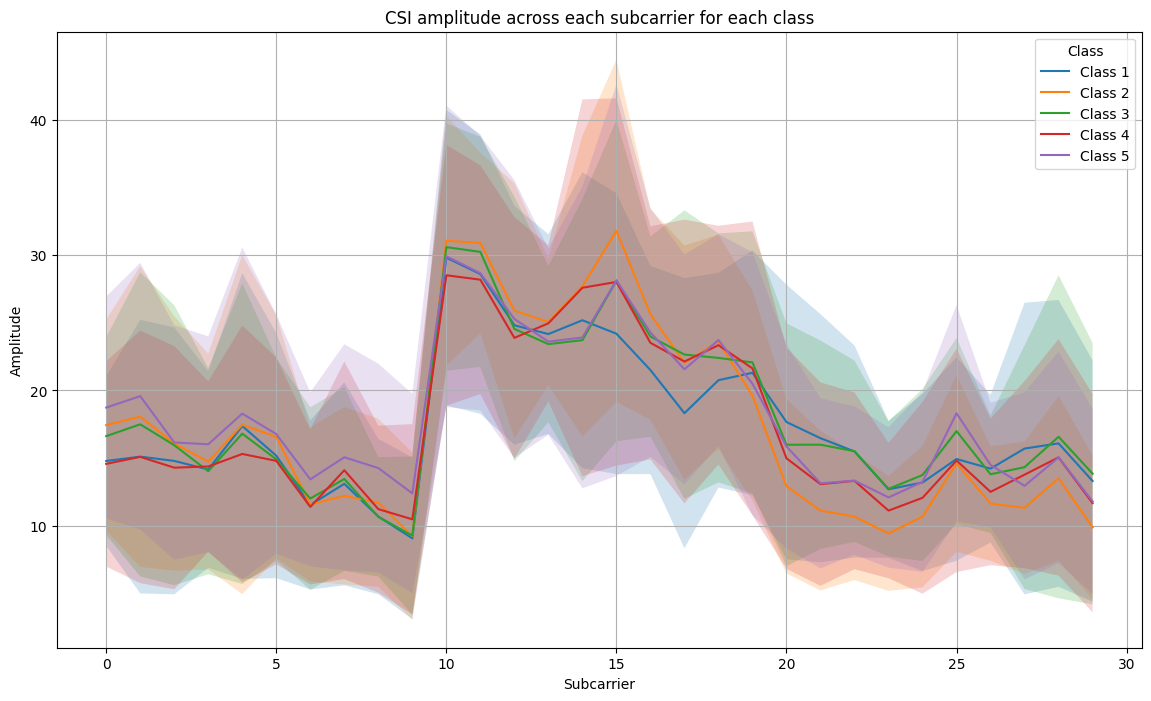

In [ ]:
def plot_amplitude_distribution_per_class():
    classes = sorted(df_labels_train[0].unique())

    plt.figure(figsize=(14, 8))

    for c in classes:
        # Get all samples for the class
        class_indices = df_labels_train[df_labels_train[0] == c].index
        class_data = df_features_train.iloc[class_indices].values.reshape(-1, 30, 3, 3)

        # Compute the amplitude for each sample
        amplitudes = np.abs(class_data).mean(axis=(2, 3))  # shape: (n_samples, 30)

        # Mean and std per subcarrier
        mean_per_subcarrier = amplitudes.mean(axis=0)
        std_per_subcarrier = amplitudes.std(axis=0)

        # Plot with shaded std area
        plt.plot(mean_per_subcarrier, label=f'Class {c}')
        plt.fill_between(
            range(30),
            mean_per_subcarrier - std_per_subcarrier,
            mean_per_subcarrier + std_per_subcarrier,
            alpha=0.2
        )

    plt.title('CSI amplitude across each subcarrier for each class')
    plt.xlabel('Subcarrier')
    plt.ylabel('Amplitude')
    plt.legend(title='Class')
    plt.grid(True)
    plt.show()

plot_amplitude_distribution_per_class()


We group the samples by class and then calculate the mean amplitude and standard deviation of each subcarrier for each class. The result is a graph taht shows the evolution of each class with its “shadow” of variability.

This is key to see if the different classes (poses) have distinct signatures in the CSI signals. If each class has a unique "pattern," it's a good sign for the classifier's performance.

##**Part II: Model implementation**

**Create a module that loads the training data and fits it into an SVM. You can leverage existing libraries that implement SVMs (e.g., pytorch).**

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

def train_svm_classifier(X_train, y_train, kernel='rbf', C=1.0, gamma='scale'):
    model = make_pipeline(StandardScaler(), SVC(kernel=kernel, C=C, gamma=gamma))
    model.fit(X_train, y_train.ravel())
    return model

# Prepare data
X_train = df_features_train.values
y_train = df_labels_train.values

# Train SVM
svm_model = train_svm_classifier(X_train, y_train)


Use SVC from sklearn with a pipeline that includes:

- Feature standardization (StandardScaler).

- Training the SVM model.

The SVM is sensitive to the scale of the data, so normalizing is crucial. Here, the model is trained with the features (CSI) to learn to associate those patterns with pose labels.

 **Generate predictions on the test dataset using the SVM trained in the previous step. For evaluating the SVM, you should define one or more success rate metrics.**


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy
# Calcula el percentatge d'encerts totals del model, és a dir, de totes les prediccions fetes, quantes coincideixen amb les etiquetes reals.
acc = accuracy_score(y_test, y_pred)
print(f" Accuracy: {acc * 100:.2f}%")

# Precision, recall, F1
# Imprimeix un informe detallat que inclou:
#     Precision: Dels exemples que el model ha classificat com una classe, quants eren correctes.
#     Recall (o sensitivitat): Dels exemples que realment eren d'aquella classe, quants ha detectat el model.
#     F1-score: Mitjana harmònica entre Precision i Recall. Ajuda a equilibrar ambdues mètriques.

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Per-class recall (success rate)
# Calcula el recall per a cada classe individualment, i el mostra com a "Success rate".
recalls = recall_score(y_test, y_pred, average=None)
for i, r in enumerate(recalls):
    print(f" Success rate for class {i}: {r * 100:.2f}%")


 Accuracy: 77.00%

 Classification Report:
              precision    recall  f1-score   support

           1       0.84      0.76      0.80        42
           2       0.71      0.82      0.76        39
           3       0.78      0.89      0.83        35
           4       0.84      0.68      0.75        38
           5       0.72      0.72      0.72        46

    accuracy                           0.77       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.77      0.77       200

 Success rate for class 0: 76.19%
 Success rate for class 1: 82.05%
 Success rate for class 2: 88.57%
 Success rate for class 3: 68.42%
 Success rate for class 4: 71.74%


In this final step, predictions are made on the test set, and the following metrics are calculated:

- Accuracy: overall correct predictions.

- Classification report: precision, recall, and F1 score per class.

- Success rate per class (specific recall).

This is done to evaluate how well the model can recognize poses based solely on the Wi-Fi signals. Each metric helps to understand a different aspect of performance.

In conclusion and seeing the results, the SVM model achieved an overall accuracy of 77% (much higher than if the model were random), showing fairly balanced performance across classes. Class 3 was the best recognized, with a recall (success rate) of 88.57%, while class 4 was the most challenging, with a recall of 68.42%. Overall, the model demonstrates good generalization ability and effective discrimination between different human poses based on Wi-Fi signals.